# Spatial Figures Peer Review

## PUT YOUR NAME HERE: Marcio Woitek

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(maps))
suppressPackageStartupMessages(library(sf))
suppressPackageStartupMessages(library(rnaturalearth))
suppressPackageStartupMessages(library(rnaturalearthdata))
suppressPackageStartupMessages(library(rgeos))

## Problem 1

Create the figure using the data included in the R Markdown file.

In [2]:
# Make some data for painting the map:
my_world_map <- map_data("world")
countries <- unique(my_world_map$region)
set.seed(987)
some_data_values <- data.frame(
    "region" = countries,
    "Score" = runif(252, 0, 100)
)

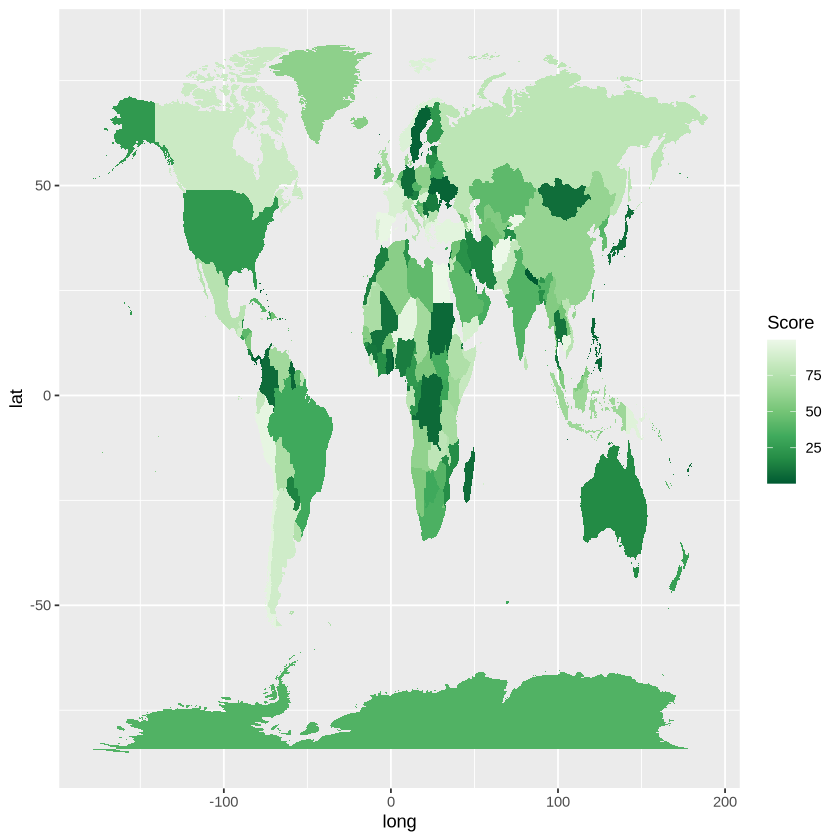

In [3]:
# Use `left_join` to combine `my_world_map` and `some_data_values`:
data_plot_1 <- dplyr::left_join(my_world_map, some_data_values, by = "region")

# Plot the figure:
ggplot2::ggplot(
    data = data_plot_1,
    mapping = ggplot2::aes(
        x = long,
        y = lat,
        group = group,
        fill = Score
    )) +
    ggplot2::geom_polygon() +
    ggplot2::scale_fill_distiller(palette = 5)

## Problem 2

Create the figure using the data included in the R Markdown file.

In [4]:
set.seed(15)
Measurement <- rnorm(32, 50, 1)

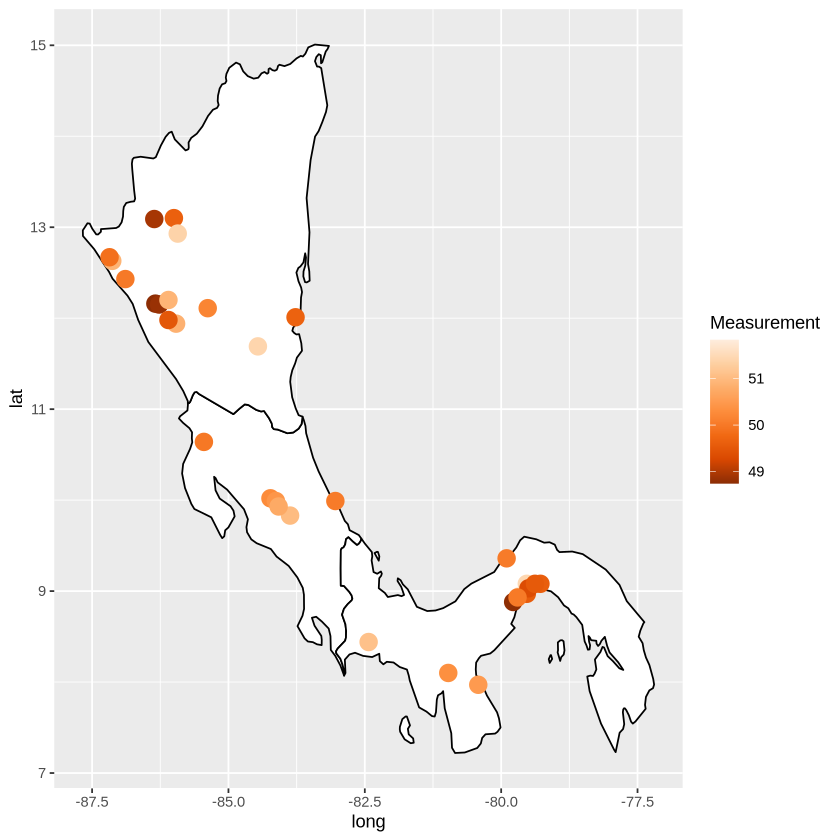

In [5]:
# Get just the maps of Costa Rica, Panama and Nicaragua:
three_countries_maps <- my_world_map %>%
    dplyr::filter(
        region == "Costa Rica" |
        region == "Panama" |
        region == "Nicaragua"
    )

# Get just the cities with a population of greater than 40,000.
# This should leave you with 32 cities.
# Add the `Measurement` variable.
three_countries_cities <- maps::world.cities %>%
    dplyr::filter(
        country.etc == "Costa Rica" |
        country.etc == "Panama" |
        country.etc == "Nicaragua"
    ) %>%
    dplyr::filter(pop > 40000) %>%
    dplyr::mutate(Measurement = Measurement)

# Plot the figure:
ggplot2::ggplot(
    data = three_countries_maps,
    mapping = ggplot2::aes(
        x = long,
        y = lat,
        group = group
    )) +
    ggplot2::geom_polygon(color = "black", fill = "white") +
    ggplot2::geom_point(
        data = three_countries_cities,
        mapping = ggplot2::aes(
            x = long,
            y = lat,
            group = NULL,
            color = Measurement,
            size = 5
        )) +
    ggplot2::scale_color_distiller(palette = 7) +
    ggplot2::guides(size = FALSE)

## Problem 3

Create the figure using the data included in the R Markdown file.

In [6]:
s_america <- ne_countries(
    scale = "medium",
    continent = "south america",
    returnclass = "sf"
)

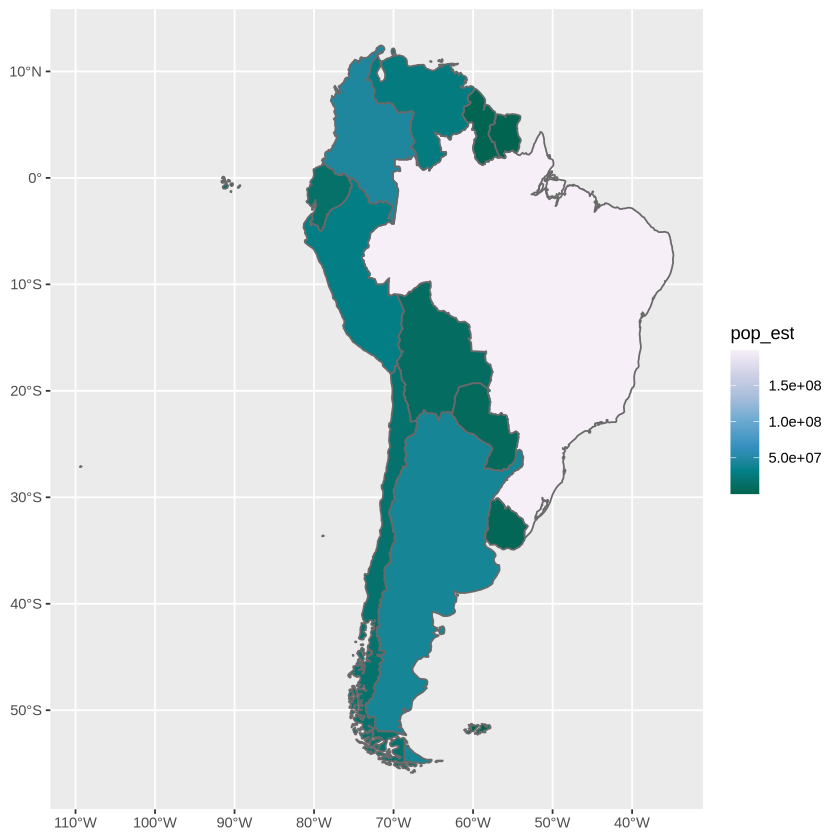

In [7]:
# Get the maps and population estimates for the South American countries:
s_america_maps_pop <- dplyr::inner_join(
    my_world_map,
    s_america %>%
        dplyr::select(admin, pop_est) %>%
        dplyr::rename(region = admin),
    by = "region"
)

# Plot the figure:
ggplot2::ggplot(
    data = s_america_maps_pop,
    mapping = ggplot2::aes(
        x = long,
        y = lat,
        group = group,
        fill = pop_est
    )) +
    ggplot2::geom_polygon(color = "dimgray") +
    ggplot2::scale_fill_distiller(palette = 10) +
    ggplot2::scale_x_continuous(
        breaks = seq(from = -110, to = -40, by = 10),
        labels = paste(
            seq(from = 110, to = 40, by = -10),
            "\u00B0W",
            sep = ""
        )) +
    ggplot2::scale_y_continuous(
        breaks = seq(from = -50, to = 10, by = 10),
        labels = c(
            paste(seq(from = 50, to = 10, by = -10), "\u00B0S", sep = ""),
            "0\u00B0",
            "10\u00B0N"
        )) +
    ggplot2::theme(
        axis.title.x = ggplot2::element_blank(),
        axis.title.y = ggplot2::element_blank(),
        panel.grid.minor.x = ggplot2::element_blank(),
        panel.grid.minor.y = ggplot2::element_blank()
    )